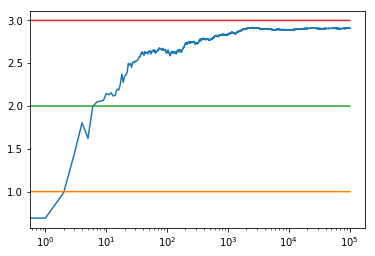

0.9988789945108156
1.9792480296061248
3.0088515712947506


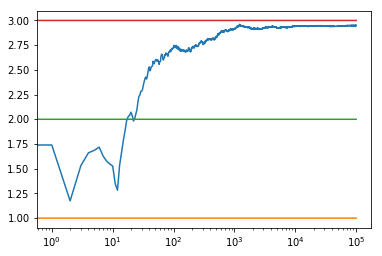

1.031649090881906
1.9984586414638097
2.9981534498018556


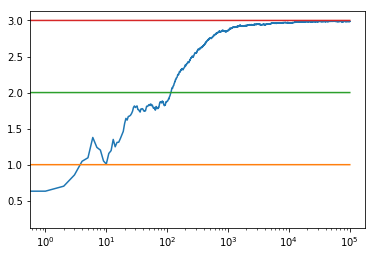

1.0156326858444826
1.9431888501307952
2.997753673481105


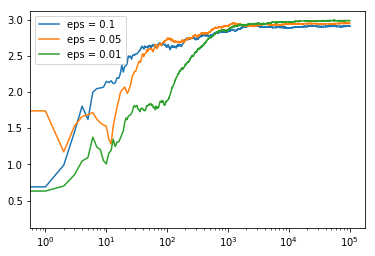

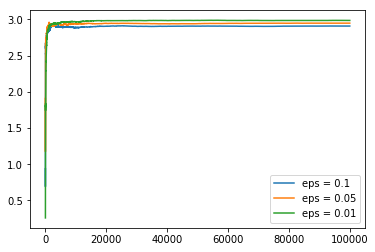

In [9]:
#revised/commented code- Cyrus

# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python

from __future__ import print_function, division #https://stackoverflow.com/questions/7075082/what-is-future-in-python-used-for-and-how-when-to-use-it-and-how-it-works
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt


class Bandit: #object oriented
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
    
    #the following two lines could replace the lines above to solve this with optimistic innitial values
    #self.mean = upper_limit
    #self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()


## Optimstic innitial values

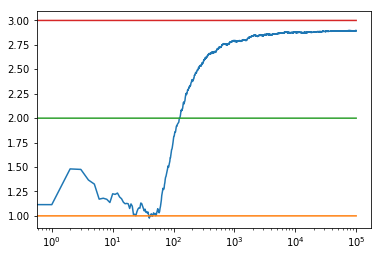

1.0327242060387511
1.9869063522483776
2.9969172633636236


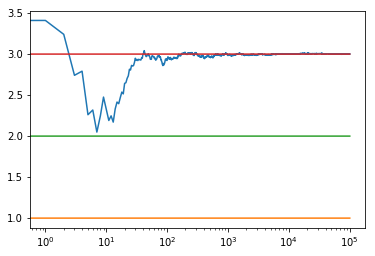

2.8147906072034132
2.956968622004987
3.0016881991544806


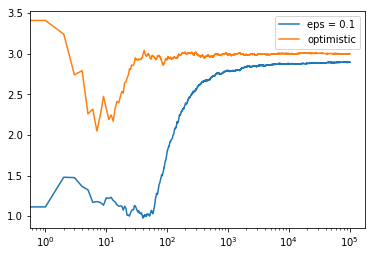

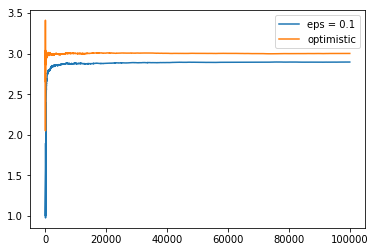

In [43]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
#from __future__ import print_function, division
#from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps
#def run_experiment_eps(m1, m2, m3, eps, N):
#    run_experiment

class Bandit:
  def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit
    self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, N, upper_limit=10):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
  oiv = run_experiment(1.0, 2.0, 3.0, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.show()


## UCB1

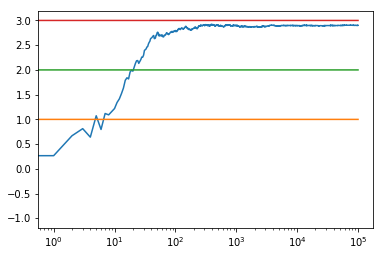

0.9742871802438916
1.997917041339488
3.001385350470268


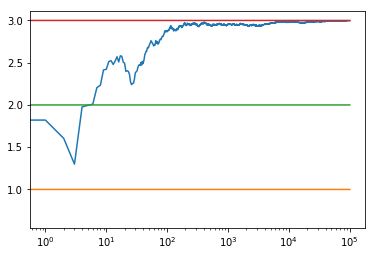

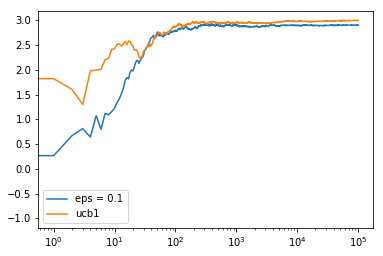

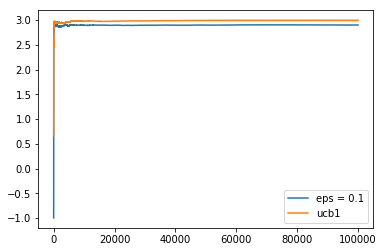

In [44]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
# https://books.google.ca/books?id=_ATpBwAAQBAJ&lpg=PA201&ots=rinZM8jQ6s&dq=hoeffding%20bound%20gives%20probability%20%22greater%20than%201%22&pg=PA201#v=onepage&q&f=false
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps


class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def ucb(mean, n, nj):
  if nj == 0:
    return float('inf')
  return mean + np.sqrt(2*np.log(n) / nj)


def run_experiment(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # for b in bandits:
  #   print("bandit nj:", b.N)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  # for b in bandits:
  #   print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  eps = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
  ucb = run_experiment(1.0, 2.0, 3.0, 100000)

  # log scale plot
  plt.plot(eps, label='eps = 0.1')
  plt.plot(ucb, label='ucb1')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(eps, label='eps = 0.1')
  plt.plot(ucb, label='ucb1')
  plt.legend()
  plt.show()



# Comparing methods above plus Thompson Bayesian 

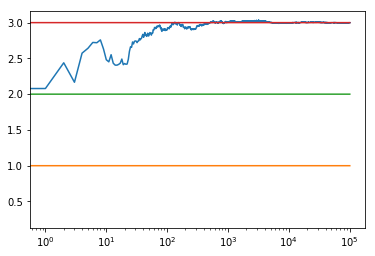

0.26723404133457385
1.7515523713177816
2.9992122339753533


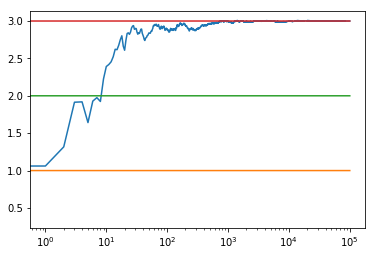

2.433027817190224
2.9444743964583835
3.0000639482391724


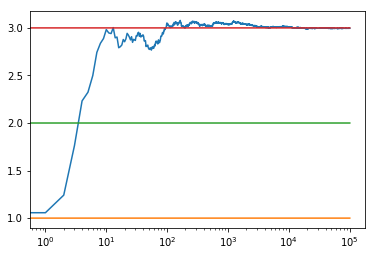

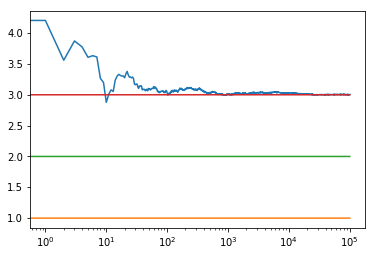

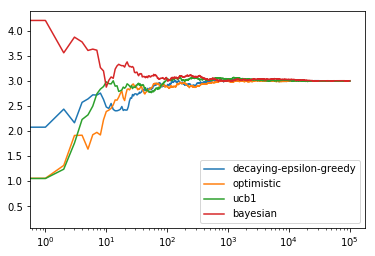

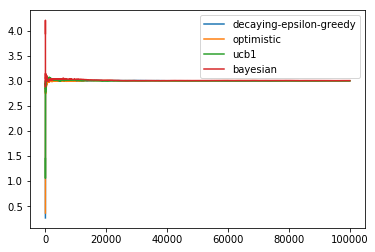

In [45]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import Bandit
from optimistic_initial_values import run_experiment as run_experiment_oiv
from ucb1 import run_experiment as run_experiment_ucb

class BayesianBandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # parameters for mu - prior is N(0,1)
    self.predicted_mean = 0
    self.lambda_ = 1
    self.sum_x = 0 # for convenience
    self.tau = 1

  def pull(self):
    return np.random.randn() + self.true_mean

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.predicted_mean = self.tau*self.sum_x / self.lambda_


def run_experiment_decaying_epsilon(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < 1.0/(i+1):
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average


def run_experiment(m1, m2, m3, N):
  bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  return cumulative_average

if __name__ == '__main__':
  m1 = 1.0
  m2 = 2.0
  m3 = 3.0
  eps = run_experiment_decaying_epsilon(m1, m2, m3, 100000)
  oiv = run_experiment_oiv(m1, m2, m3, 100000)
  ucb = run_experiment_ucb(m1, m2, m3, 100000)
  bayes = run_experiment(m1, m2, m3, 100000)

  # log scale plot
  plt.plot(eps, label='decaying-epsilon-greedy')
  plt.plot(oiv, label='optimistic')
  plt.plot(ucb, label='ucb1')
  plt.plot(bayes, label='bayesian')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(eps, label='decaying-epsilon-greedy')
  plt.plot(oiv, label='optimistic')
  plt.plot(ucb, label='ucb1')
  plt.plot(bayes, label='bayesian')
  plt.legend()
  plt.show()

